# WCF | side tests

### Includes

The usual.

In [52]:
%matplotlib notebook

from math import factorial
import numpy as np
import scipy.linalg as linalg
# from scipy.special import gammaln
# #from scipy.optimize import minimize
# from scipy.optimize import minimize_scalar
# from scipy.optimize import basinhopping
# from scipy.optimize import bisect
# from scipy.optimize import brenth
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
from matplotlib.patches import Ellipse

### Template for plotting

In [ ]:
plt.figure(0)
#ax=plt.gca()
#ax.set_ylim([a,b])
#ax.set_xlim([c,d])


x = np.arange(-np.pi,np.pi,0.01)
#y = 
#plt.plot(x,y)


### Normalisation on the 2 &rarr;1 merge

Here I try to see if the merge condition yields the same constraints on θ with and without applying the $$ f(x)=\frac{x+1}{x+2}. $$

Result: Numerically the condition turns out to be the same. So what is going wrong?

<IPython.core.display.Javascript object>


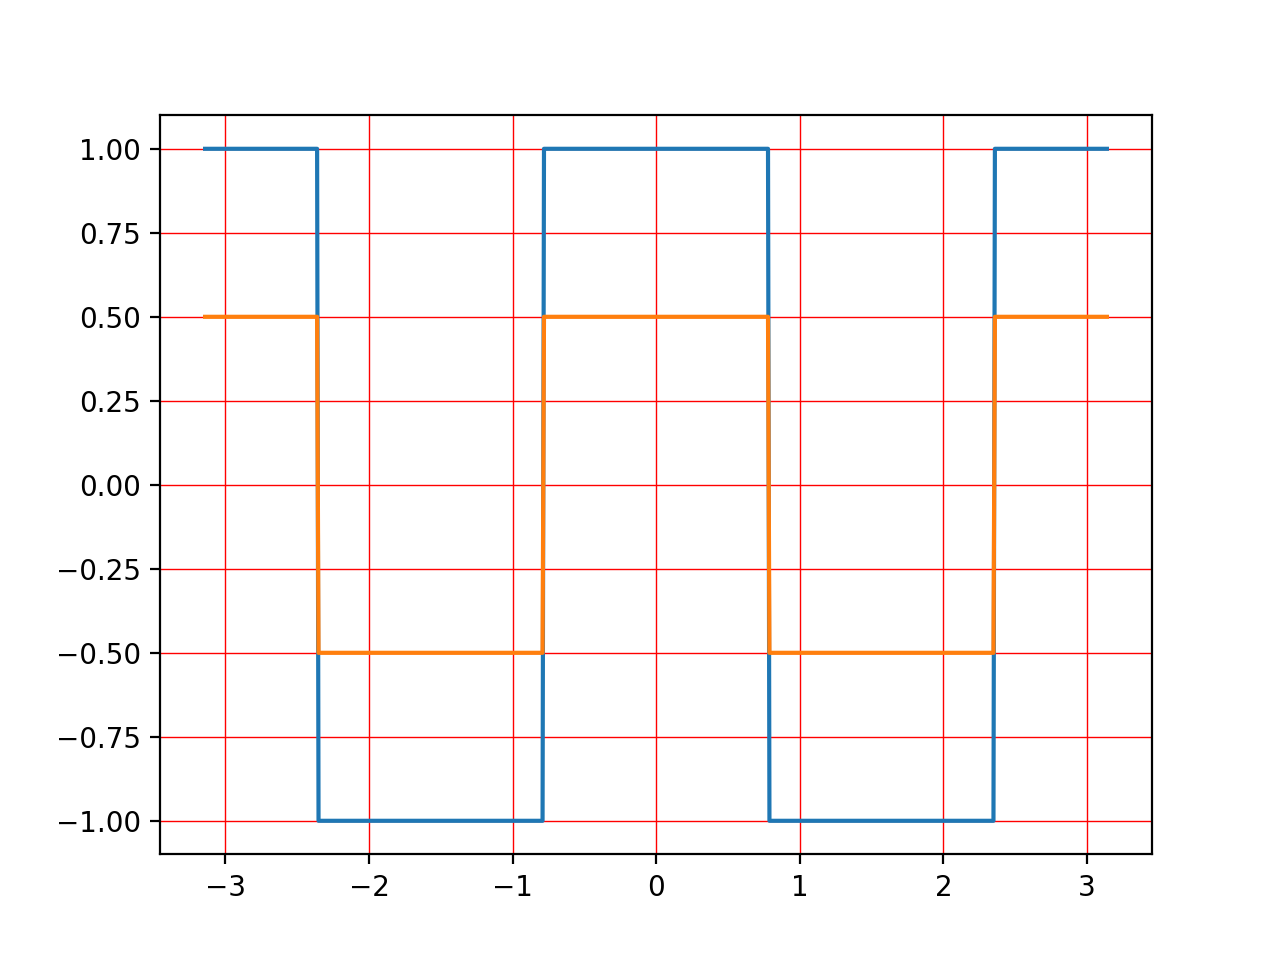

trace (for the second) =  0.2761904761904762
<x_h>-<x_g>= 0.0
<x'_h>-<x'_g>= 0.03809523809523818


In [43]:
xh1=3
xg1=1
xg2=5


plt.figure(1)
ax=plt.gca()
ax.grid(color='r', linestyle='-', linewidth=0.5)
#ax.set_ylim([a,b])
#ax.set_xlim([c,d])


θ = np.arange(-np.pi,np.pi,0.01)
d1 = xh1 - (xg1 * (np.cos(θ)**2) + xg2 * (np.sin(θ)**2)) #determinant 1

plt.plot(θ,np.sign(d1))

#Now we try the same thing with the normalised version

def f(x):
    return (x+1.0)/(x+2)

yh1=f(xh1)
yg1=f(xg1)
yg2=f(xg2)


d2= yh1 - (yg1*(np.cos(θ)**2) + yg2*(np.sin(θ)**2)) - yg1*yh1*(np.sin(θ)**2) - yg2*yh1*(np.cos(θ)**2) + (yg1*(np.cos(θ)**2) + yg2*(np.sin(θ)**2))*(yg1*(np.sin(θ)**2) + yg2*(np.cos(θ)**2)) - (yg1-yg2)**2  * (np.cos(θ)**2) * (np.sin(θ)**2)

t2 = yh1 + 1 - yg1 - yg2

plt.plot(θ,0.5*np.sign(d2))

print("trace (for the second) = ",t2)

print("<x_h>-<x_g>=", xh1 - 0.5*(xg1+xg2))
print("<x'_h>-<x'_g>=", yh1 - 0.5*(yg1+yg2))

I plot validity (true if greater than zero) as a function of θ.

In [51]:
a = np.arange(0.5,1,0.1)
b = np.arange(-1,0,0.1)
print(a,b)
#c=np.concatenate(a,b)
#print(c)
c=np.append(a,b)

[ 0.5  0.6  0.7  0.8  0.9] [-1.  -0.9 -0.8 -0.7 -0.6 -0.5 -0.4 -0.3 -0.2 -0.1]


## Dictionary Parameter Passing

This will increase my speed of making changes to my code.

The following example should clarify how to achieve this ([source](https://codefellows.github.io/sea-f2-python-sept14/session05.html)). If it doesn't consider looking at [this](https://stackoverflow.com/questions/11315010/what-do-and-before-a-variable-name-mean-in-a-function-signature) stack overflow answer.

In [8]:
def f(x=1, y=1, w=0, h=0):
    print ("position: %s, %s -- shape: %s, %s"%(x, y, w, h))

position = (3,4)
size = {'h': 10, 'w': 20}

f( *position, **size)
f(**size)
#position: 3, 4 -- shape: 20, 10

position: 3, 4 -- shape: 20, 10
position: 1, 1 -- shape: 20, 10


In [5]:
def g(par):
    f(**par)

In [14]:
g({'h':10})

position: 1, 1 -- shape: 0, 10


# Plotting for the 1/10 draft

<IPython.core.display.Javascript object>


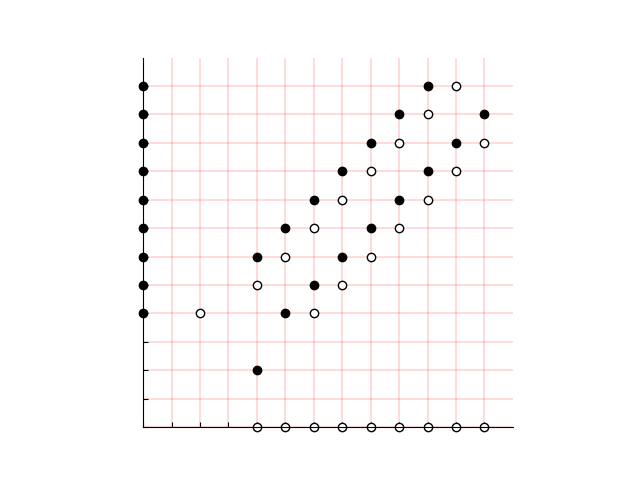

In [111]:
def mirrorPlot(plt,x,y):
    plt.scatter(x,y,facecolors='white',edgecolors='black',clip_on=False)
    plt.scatter(y,x,facecolors='black',edgecolors='black',clip_on=False)

plt.figure(0)

z=4 #starting location
l=1 #0 is dip dip boom; 1 is the 1/10 protocol and so on
Γ=12 #ending location

ax=plt.gca()
ax.tick_params(axis='both',which='both',direction='in')#bottom=False,top=False,labelbottom=False)
ax.set_aspect('equal')
ax.set_ylim([0,Γ+1])
ax.set_xlim([0,Γ+1])
ax.set_xticklabels([]) #To remove the labels produced; 1, 2 and so on
ax.set_yticklabels([])

ax.spines['top'].set_visible(False) #removes the frame which is typically produced
ax.spines['right'].set_visible(False)
#ax.spines['bottom'].set_visible(False)
#ax.spines['left'].set_visible(False)

#ax.axhline(y=0, color='gray') #this was for adding horizontal and vertical lines through the origin but 
                               #it passes through the points
#ax.axvline(x=0, color='gray')
ax.set_axisbelow(True) #This is to keep the axis below the points being plotted (don't know why this is not the default)

ax.set_xticks(np.arange(0,Γ+1,1)) #This is to get the grid where I want it to be
ax.set_yticks(np.arange(0,Γ+1,1))

ax.grid(color='r', linestyle='-', linewidth=0.2) #this is to enable the grid

#points on the axis

if(l==0): #This is the dip dip boom like protocol; doesn't need truncation at the bottom; the axis point is one less here
    d = np.arange(z+1,Γ+1,1)
else: #This is for the rest; these need one more point on the axis
    d = np.arange(z,Γ+1,1)
    
x = d 
y = d*0
mirrorPlot(plt,x,y) #This makes the plot symmetric and handles the color accordingly


#points on the first line of the ladder

d = np.arange(z,Γ,1) 

x = d 
y = x + 1
mirrorPlot(plt,x,y)

#points on the second line of the ladder
if(l>=1):
    d = np.arange(z,Γ-1,1)

    x = d
    y = d+2
    mirrorPlot(plt,y,x)


#points on the third line of the ladder
if(l>=2):
    d = np.arange(z,Γ-2,1)

    x = d
    y = d+3
    mirrorPlot(plt,x,y)


#point left
if(l>=1):
    x = [z-1-l]
    y = [z]
    mirrorPlot(plt,x,y)


In [113]:
plt.savefig('1by10.svg')